In [1]:
import numpy as np
import matplotlib.pyplot as plt
import basicDeltaOperations as op
import seaborn as sns
import json

In [2]:
with open('120k_Data.json') as f:
    neg120k = json.load(f)

with open('EA_IRMS_Data.json') as f:
    EAData = json.load(f)

In [4]:
def compare13CDeltas(delta1, delta2):
    ratio1 = (delta1 / 1000 + 1) * 0.011118
    ratio2 = (delta2 / 1000 + 1) * 0.011118

    return 1000 * (ratio1 / ratio2 - 1)

Text(0, 0.5, 'Caltech Results $\\delta^{13C}_{PDB}$')

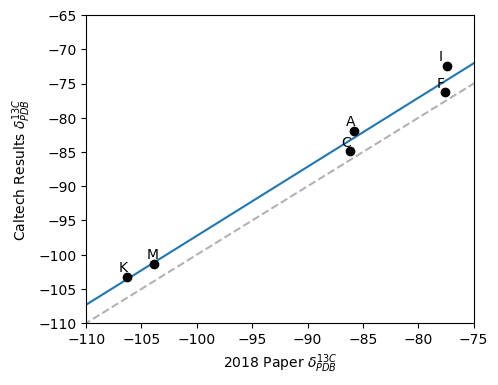

In [6]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Moran et al']
yDict = EAData['Weighing 2023']
fig, ax = plt.subplots(figsize = (5,4), dpi =100)

for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(yDict[MPAKey]['13C/Unsub']['Delta VPDB'])
        yerr.append(yDict[MPAKey]['13C/Unsub']['Error'])

        ax.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75, yDict[MPAKey]['13C/Unsub']['Delta VPDB'] + 0.75, MPAKey[-1])

ax.errorbar(xs, ys, xerr = xerr, yerr = yerr, fmt = 'o', c = 'k')


ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-75)
ax.set_ylim(-110,-65)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('2018 Paper $\delta^{13C}_{PDB}$')
ax.set_ylabel("Caltech Results $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbi-IRMS $\\delta^{13C}_{VPDB}$')

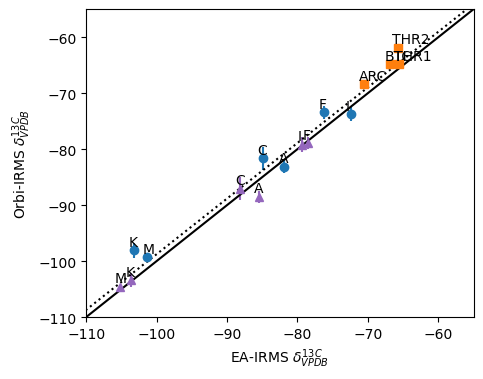

In [8]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Solvent 2022']
yDict = neg120k
fig, ax = plt.subplots(figsize = (5,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

for xIdx, xDict in enumerate([EAData['Solvent 2022'], EAData['Weighing 2023']]):
        for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
                if MPAKey not in ['SIG']:
                        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
                        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
                        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

                        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

                        if MPAKey in expSamples:
                                fmt = 'o'
                                c = 'tab:blue'
                        else:
                                fmt = 's'
                                c = 'tab:orange'

                        if xIdx == 0:
                                fmt = '^'
                                c = 'tab:purple'

                        ax.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

                        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
                        xerr.append(MPAData['13C/Unsub']['Error'])
                        ys.append(deltaOrbiVPDB)
                        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

                        ax.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)


#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-55)
ax.set_ylim(-110,-55)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
ax.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
ax.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

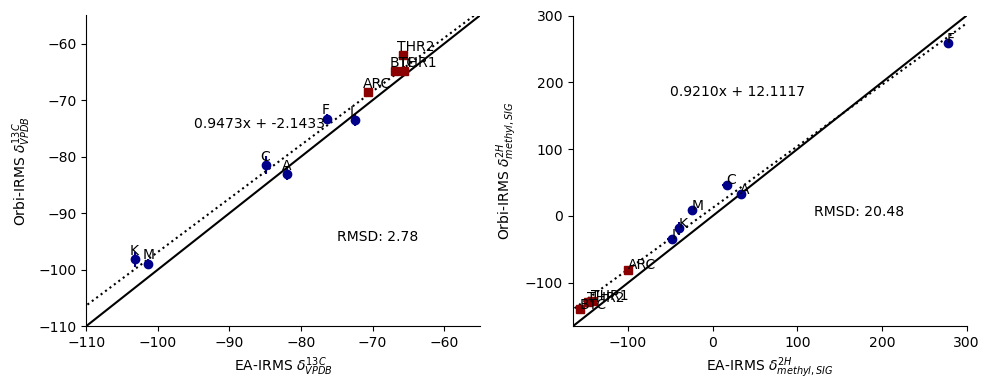

In [30]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []
xerr = []
yerr = []

xDict = EAData['Weighing 2023']
yDict = neg120k
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4), dpi =100)
expSamples = ['A','F','K','I','M','C']

cAx = axes[0]
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['13C/Unsub']['Delta Mean']
        deltaSigVPDB = op.deltaToRatio('13C',xDict['SIG']['13C/Unsub']['Delta VPDB'])
        deltaOrbiR = (deltaOrbi / 1000 + 1) * deltaSigVPDB

        deltaOrbiVPDB = op.ratioToDelta('13C',deltaOrbiR)

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(MPAData['13C/Unsub']['Delta VPDB'], deltaOrbiVPDB, xerr = MPAData['13C/Unsub']['Error'], yerr = yDict[MPAKey]['13C/Unsub']['ER'], fmt = fmt, c = c)

        xs.append(MPAData['13C/Unsub']['Delta VPDB'])
        xerr.append(MPAData['13C/Unsub']['Error'])
        ys.append(deltaOrbiVPDB)
        yerr.append(yDict[MPAKey]['13C/Unsub']['ER'])

        cAx.text(MPAData['13C/Unsub']['Delta VPDB'] -0.75,deltaOrbiVPDB + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-110,-55)
cAx.set_ylim(-110,-55)

coef = np.polyfit(xs,ys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,100)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,100], [-200,100], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(ys) - np.array(xs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(-75, -95, 'RMSD: ' + f'{RMSD:.2f}')

cAx.text(-95, -75, f'{coef[0]:.4f}' + 'x + ' + f'{coef[1]:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{13C}_{VPDB}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{13C}_{VPDB}$")

cAx = axes[1]
xDict = EAData['UNM 2023']
hxs = []
hxerr = []
hys = []
hyerr = []
for MPAIdx, (MPAKey, MPAData) in enumerate(xDict.items()):
    if MPAKey not in ['SIG']:
        deltaOrbi = yDict[MPAKey]['D/Unsub']['Delta Mean']
        deltaOrbiErr = yDict[MPAKey]['D/Unsub']['ER']
        deltaOrbiScaled = 4/3 * deltaOrbi
        deltaOrbiErrScaled = 4/3 * deltaOrbiErr

        deltaEAVSMOW = xDict[MPAKey]['D/Unsub']['Delta VSMOW']
        deltaEAVSMOWErr = xDict[MPAKey]['D/Unsub']['Error']
        EAratio = op.deltaToRatio('D',deltaEAVSMOW)

        deltaSigVSMOW = xDict['SIG']['D/Unsub']['Delta VSMOW']
        SIGratio = op.deltaToRatio('D', deltaSigVSMOW)

        deltaEAvsSIG = 1000 * (EAratio / SIGratio - 1)
        deltaEAScaled = 5/3 * deltaEAvsSIG
        deltaEAErrScaled = 5/3 * deltaEAVSMOWErr

        if MPAKey in expSamples:
                fmt = 'o'
                c = 'darkblue'
        else:
                fmt = 's'
                c = 'darkred'

        cAx.errorbar(deltaEAScaled, deltaOrbiScaled, xerr = deltaEAErrScaled, yerr = deltaOrbiErrScaled, fmt = fmt, c = c)

        hxs.append(deltaEAScaled)
        hxerr.append(deltaEAErrScaled)
        hys.append(deltaOrbiScaled)
        hyerr.append(deltaOrbiErrScaled)

        cAx.text(deltaEAScaled -0.75,deltaOrbiScaled + 0.75, MPAKey)

#ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
cAx.set_xlim(-165,300)
cAx.set_ylim(-165,300)

coef = np.polyfit(hxs,hys,1)
poly1d_fn = np.poly1d(coef) 

xLinePlot = (-200,300)

cAx.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'k',linestyle = ':')
cAx.plot([-200,300], [-200,300], color = 'k',linestyle = '-')
#ax.text(-102,-82, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

serr = (np.array(hys) - np.array(hxs))**2
RMSD = np.sqrt(serr.mean())
cAx.text(120, 0, 'RMSD: ' + f'{RMSD:.2f}')

cAx.text(-50, 180, f'{coef[0]:.4f}' + 'x + ' + f'{coef[1]:.4f}')

cAx.set_xlabel('EA-IRMS $\delta^{2H}_{methyl, SIG}$')
cAx.set_ylabel("Orbi-IRMS $\delta^{2H}_{methyl, SIG}$")

plt.tight_layout()
sns.despine()

In [31]:
(xs - ys).mean()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [33]:
np.sqrt(((xs-ys)**2).mean())

2.378565571933725

In [34]:
xs-ys

array([ 1.20630382, -2.84484862,  1.34217471, -2.03647763, -3.26313337,
       -2.18847218, -2.05988627, -3.90080951, -0.72406131])

NameError: name 'caltech20220923' is not defined

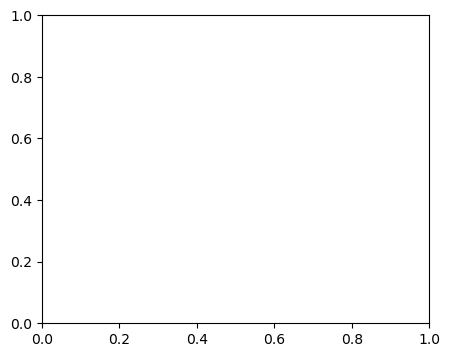

In [9]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []

fig, ax = plt.subplots(figsize = (5,4), dpi =100)
for MPAIdx, (MPAKey, MPAData) in enumerate(caltech20220923.items()):
    if MPAKey != 'MPA STD':
        print(MPAData)
        thisEADelta = compare13CDeltas(MPAData, caltech20220923['MPA STD'])
        print(thisEADelta)

        thisOrbiDelta = (neg120k[MPAKey[-1]]['13C/Unsub']['Mean'] - 1) * 1000
        thisOrbiErr = neg120k[MPAKey[-1]]['13C/Unsub']['Std'] * 1000

        xs.append(thisEADelta)
        ys.append(thisOrbiDelta)
        ax.errorbar(thisEADelta,thisOrbiDelta,yerr = thisOrbiErr, fmt = 'o', c = 'k')
        ax.text(thisEADelta - 0.75, thisOrbiDelta + 1, MPAKey[-1])

ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(0,35)
ax.set_ylim(0,35)

#coef = np.polyfit(xs,ys,1)
#poly1d_fn = np.poly1d(coef) 

#xLinePlot = (-200,100)

#ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(10,20, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('Caltech EA $\delta^{13C}_{STD}$')
ax.set_ylabel("Orbitrap $\delta^{13C}_{STD}$")

NameError: name 'moran2018' is not defined

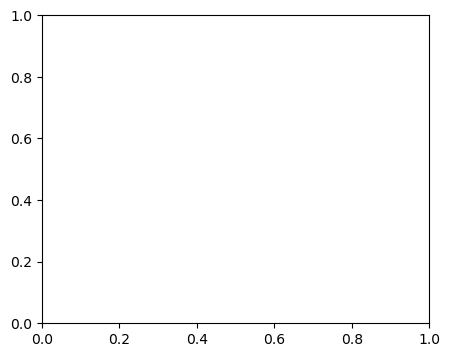

In [10]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []

fig, ax = plt.subplots(figsize = (5,4), dpi =100)
for MPAIdx, (MPAKey, MPAData) in enumerate(moran2018.items()):
    thisEADelta = MPAData['Mean']

    OrbiRatioVsStd = neg120k[MPAKey[-1]]['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118

    deltaOrbiVsPDB = 1000 * (OrbiRatVsPDB - 1)

    thisOrbiErr = neg120k[MPAKey[-1]]['13C/Unsub']['Std'] * 1000

    xs.append(thisEADelta)
    ys.append(deltaOrbiVsPDB)
    ax.errorbar(thisEADelta,deltaOrbiVsPDB,yerr = thisOrbiErr, fmt = 'o', c = 'k')
    ax.text(thisEADelta - 0.75, deltaOrbiVsPDB + 1, MPAKey[-1])

ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-60)
ax.set_ylim(-110,-60)

#coef = np.polyfit(xs,ys,1)
#poly1d_fn = np.poly1d(coef) 

#xLinePlot = (-200,100)

#ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(10,20, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('2018 EA $\delta^{13C}_{PDB}$')
ax.set_ylabel("Orbitrap $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbitrap $\\delta^{13C}_{PDB}$')

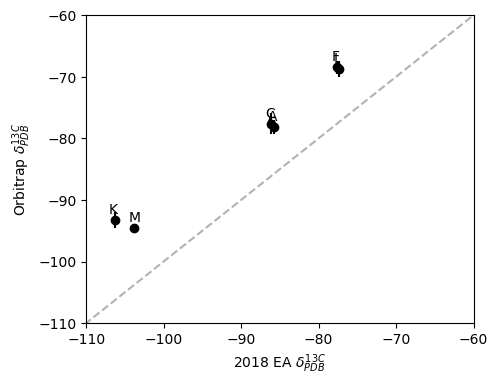

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []

fig, ax = plt.subplots(figsize = (5,4), dpi =100)
for MPAIdx, (MPAKey, MPAData) in enumerate(moran2018.items()):
    thisEADelta = MPAData['Mean']

    OrbiRatioVsStd = neg120k[MPAKey[-1]]['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118

    deltaOrbiVsPDB = 1000 * (OrbiRatVsPDB - 1)

    thisOrbiErr = neg120k[MPAKey[-1]]['13C/Unsub']['Std'] * 1000

    xs.append(thisEADelta)
    ys.append(deltaOrbiVsPDB)
    ax.errorbar(thisEADelta,deltaOrbiVsPDB,yerr = thisOrbiErr, fmt = 'o', c = 'k')
    ax.text(thisEADelta - 0.75, deltaOrbiVsPDB + 1, MPAKey[-1])

ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-110,-60)
ax.set_ylim(-110,-60)

#coef = np.polyfit(xs,ys,1)
#poly1d_fn = np.poly1d(coef) 

#xLinePlot = (-200,100)

#ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(10,20, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('2018 EA $\delta^{13C}_{PDB}$')
ax.set_ylabel("Orbitrap $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbitrap $\\delta^{13C}_{PDB}$')

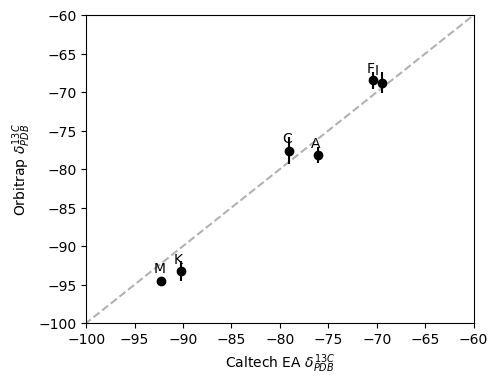

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []

fig, ax = plt.subplots(figsize = (5,4), dpi =100)
for MPAIdx, (MPAKey, MPAData) in enumerate(caltech20220923.items()):
    if MPAKey != 'MPA STD':
        thisEADelta = MPAData

        OrbiRatioVsStd = neg120k[MPAKey[-1]]['13C/Unsub']['Mean']
        StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
        OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118

        deltaOrbiVsPDB = 1000 * (OrbiRatVsPDB - 1)

        thisOrbiErr = neg120k[MPAKey[-1]]['13C/Unsub']['Std'] * 1000

        xs.append(thisEADelta)
        ys.append(deltaOrbiVsPDB)
        ax.errorbar(thisEADelta,deltaOrbiVsPDB,yerr = thisOrbiErr, fmt = 'o', c = 'k')
        ax.text(thisEADelta - 0.75, deltaOrbiVsPDB + 1, MPAKey[-1])

ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-100,-60)
ax.set_ylim(-100,-60)

#coef = np.polyfit(xs,ys,1)
#poly1d_fn = np.poly1d(coef) 

#xLinePlot = (-200,100)

#ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(10,20, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('Caltech EA $\delta^{13C}_{PDB}$')
ax.set_ylabel("Orbitrap $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbitrap $\\delta^{13C}_{PDB}$')

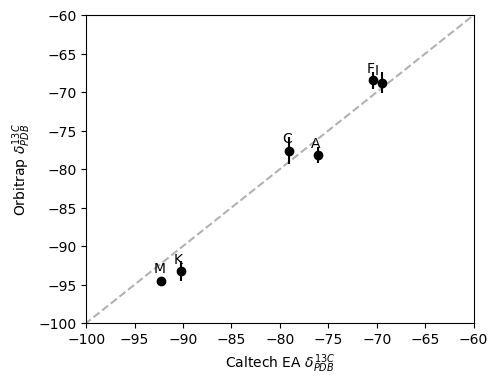

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []

fig, ax = plt.subplots(figsize = (5,4), dpi =100)
for MPAIdx, (MPAKey, MPAData) in enumerate(caltech20220923.items()):
    if MPAKey != 'MPA STD':
        thisEADelta = MPAData

        OrbiRatioVsStd = neg120k[MPAKey[-1]]['13C/Unsub']['Mean']
        StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
        OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118

        deltaOrbiVsPDB = 1000 * (OrbiRatVsPDB - 1)

        thisOrbiErr = neg120k[MPAKey[-1]]['13C/Unsub']['Std'] * 1000

        xs.append(thisEADelta)
        ys.append(deltaOrbiVsPDB)
        ax.errorbar(thisEADelta,deltaOrbiVsPDB,yerr = thisOrbiErr, fmt = 'o', c = 'k')
        ax.text(thisEADelta - 0.75, deltaOrbiVsPDB + 1, MPAKey[-1])

ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-100,-60)
ax.set_ylim(-100,-60)

#coef = np.polyfit(xs,ys,1)
#poly1d_fn = np.poly1d(coef) 

#xLinePlot = (-200,100)

#ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(10,20, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('Caltech EA $\delta^{13C}_{PDB}$')
ax.set_ylabel("Orbitrap $\delta^{13C}_{PDB}$")

Text(0, 0.5, 'Orbitrap $\\delta^{13C}_{PDB}$')

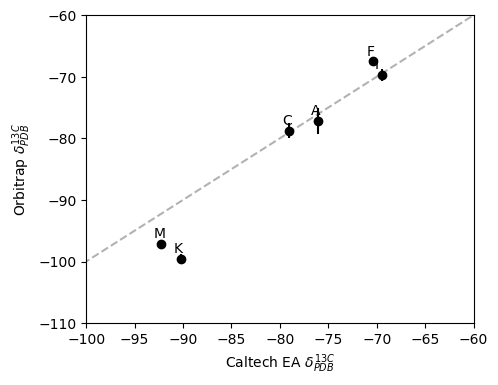

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xs = []
ys = []

fig, ax = plt.subplots(figsize = (5,4), dpi =100)
for MPAIdx, (MPAKey, MPAData) in enumerate(caltech20220923.items()):
    if MPAKey != 'MPA STD':
        thisEADelta = MPAData

        OrbiRatioVsStd = neg45k[MPAKey[-1]]['13C/Unsub']['Mean']
        StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
        OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118

        deltaOrbiVsPDB = 1000 * (OrbiRatVsPDB - 1)

        thisOrbiErr = neg45k[MPAKey[-1]]['13C/Unsub']['Std'] * 1000

        xs.append(thisEADelta)
        ys.append(deltaOrbiVsPDB)
        ax.errorbar(thisEADelta,deltaOrbiVsPDB,yerr = thisOrbiErr, fmt = 'o', c = 'k')
        ax.text(thisEADelta - 0.75, deltaOrbiVsPDB + 1, MPAKey[-1])

ax.plot([-125,100],[-125,100], color = 'k', linestyle = '--',alpha = 0.3)
ax.set_xlim(-100,-60)
ax.set_ylim(-110,-60)

#coef = np.polyfit(xs,ys,1)
#poly1d_fn = np.poly1d(coef) 

#xLinePlot = (-200,100)

#ax.plot(xLinePlot, poly1d_fn(xLinePlot), color = 'tab:blue',linestyle = '-')
#ax.text(10,20, "{:.2f}".format(coef[0]) + ' + ' + "{:.2f}".format(coef[1]))

ax.set_xlabel('Caltech EA $\delta^{13C}_{PDB}$')
ax.set_ylabel("Orbitrap $\delta^{13C}_{PDB}$")

(-150.0, 220.0)

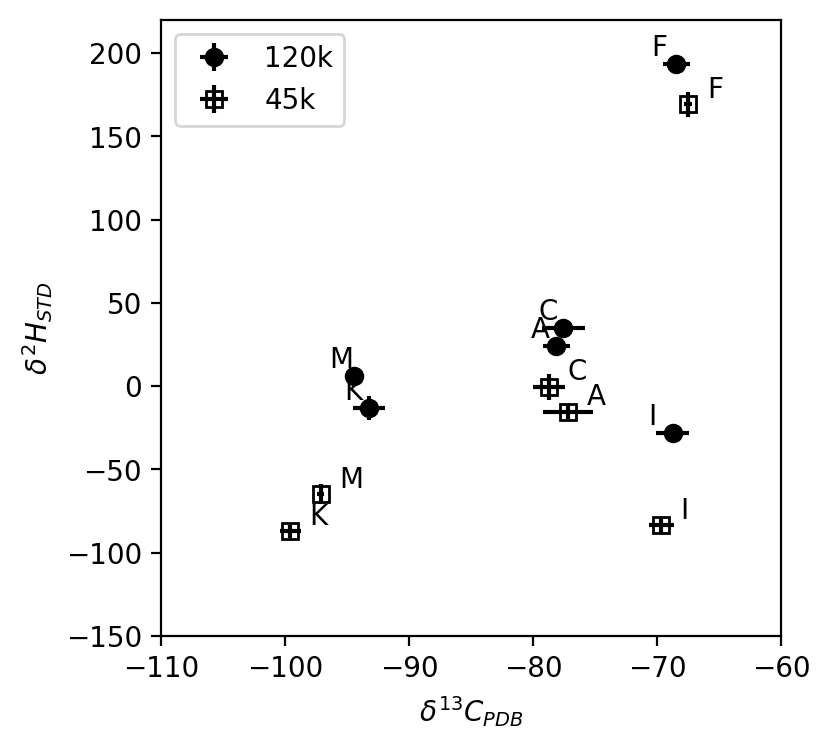

In [ ]:
from collections import OrderedDict

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 200)

for MPAKey, MPAData in neg120k.items():
    
    OrbiRatioVsStd = MPAData['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    carbonMean = 1000 * (OrbiRatVsPDB - 1)

    carbonErr = MPAData['13C/Unsub']['Std'] * 1000
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1) * 1000
    hydrogenErr = MPAData['D/Unsub']['Std'] * 1000

    ax.errorbar(carbonMean,hydrogenMean, xerr = carbonErr,
            yerr = hydrogenErr, fmt = 'o', color = 'k', label = '120k')
    ax.set_xlabel("$\delta^{13}C_{PDB}$")
    ax.set_ylabel("$\delta^{2}H_{STD}$")
    ax.text(carbonMean - 2, hydrogenMean+5, MPAKey)

for MPAKey, MPAData in neg45k.items():
    
    OrbiRatioVsStd = MPAData['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    carbonMean = 1000 * (OrbiRatVsPDB - 1)

    carbonErr = MPAData['13C/Unsub']['Std'] * 1000
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1) * 1000
    hydrogenErr = MPAData['D/Unsub']['Std'] * 1000

    ax.errorbar(carbonMean,hydrogenMean, xerr = carbonErr,
            yerr = hydrogenErr, fmt = 's', mfc = 'None', mec = 'k', ecolor ='k', label = '45k')
    ax.set_xlabel("$\delta^{13}C_{PDB}$")
    ax.set_ylabel("$\delta^{2}H_{STD}$")
    ax.text(carbonMean + 1.5, hydrogenMean+4, MPAKey)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
                               
        
ax.set_xlim(-110,-60)
ax.set_ylim(-150,220)

0.01138124
0.010286813132400749
-79.89149084072022
0.01135888
0.010266603283417643
-81.69916964064028
0.011469562
0.010366642035884017
-72.75115958103618
0.011480742
0.01037674696037557
-71.84732018107609


(-150.0, 300.0)

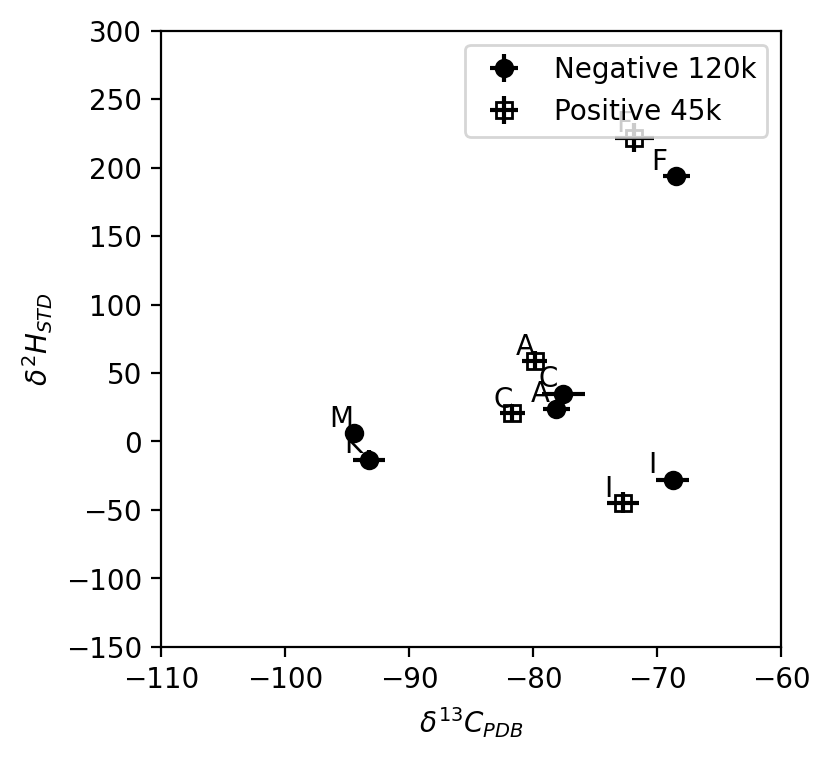

In [ ]:
from collections import OrderedDict

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 200)

for MPAKey, MPAData in neg120k.items():
    
    OrbiRatioVsStd = MPAData['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    carbonMean = 1000 * (OrbiRatVsPDB - 1)

    carbonErr = MPAData['13C/Unsub']['Std'] * 1000
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1) * 1000
    hydrogenErr = MPAData['D/Unsub']['Std'] * 1000

    ax.errorbar(carbonMean,hydrogenMean, xerr = carbonErr,
            yerr = hydrogenErr, fmt = 'o', color = 'k', label = 'Negative 120k')
    ax.set_xlabel("$\delta^{13}C_{PDB}$")
    ax.set_ylabel("$\delta^{2}H_{STD}$")
    ax.text(carbonMean - 2, hydrogenMean+5, MPAKey)

for MPAKey, MPAData in pos45k.items():
    OrbiRatioVsStd = (MPAData['13C/Unsub']['Mean'] / 1000 +1) * 0.01118

    print(OrbiRatioVsStd)
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    print(OrbiRatVsPDB)
    carbonMean = 1000 * (OrbiRatVsPDB /  0.01118 - 1)

    print(carbonMean)

    carbonErr = MPAData['13C/Unsub']['Std']
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1)  * 3/2
    hydrogenErr = MPAData['D/Unsub']['Std'] * 3/2

    ax.errorbar(carbonMean,hydrogenMean, xerr = carbonErr,
            yerr = hydrogenErr, fmt = 's', mfc = 'None', mec = 'k', ecolor ='k', label = 'Positive 45k')
    ax.set_xlabel("$\delta^{13}C_{PDB}$")
    ax.set_ylabel("$\delta^{2}H_{STD}$")
    ax.text(carbonMean - 1.5, hydrogenMean+4, MPAKey)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
                               
        
ax.set_xlim(-110,-60)
ax.set_ylim(-150,300)

0.0113760972
0.010282164867134635
-80.30725696470175
0.011382358
0.010287823624849906
-79.80110690072406
0.011471798
0.010368663020782327
-72.57039170104407
0.011478506
0.01037472597547726
-72.02808806106809


(-150.0, 300.0)

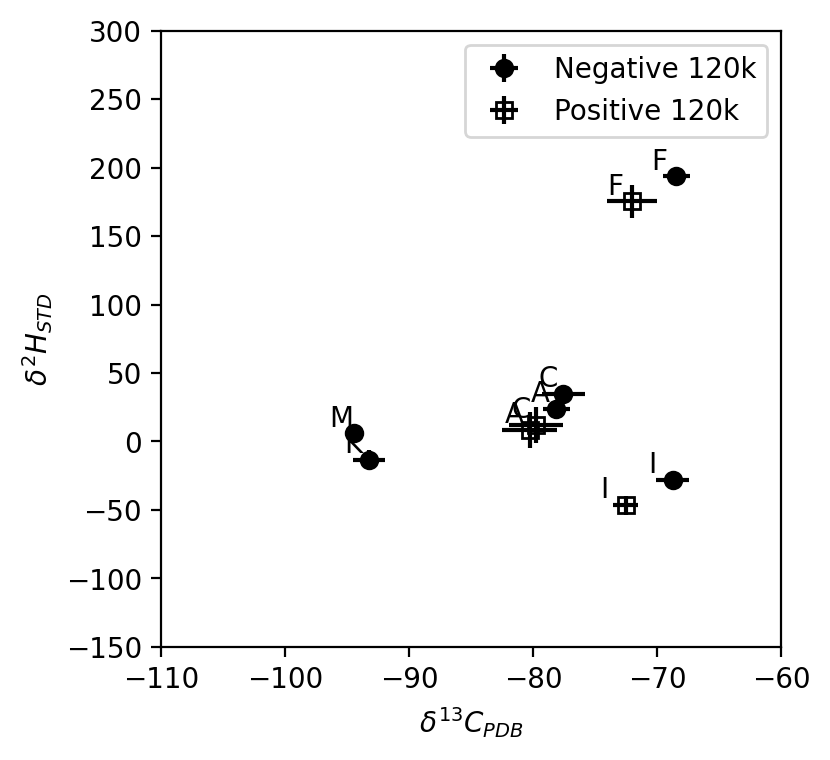

In [ ]:
from collections import OrderedDict

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 200)

for MPAKey, MPAData in neg120k.items():
    
    OrbiRatioVsStd = MPAData['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    carbonMean = 1000 * (OrbiRatVsPDB - 1)

    carbonErr = MPAData['13C/Unsub']['Std'] * 1000
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1) * 1000
    hydrogenErr = MPAData['D/Unsub']['Std'] * 1000

    ax.errorbar(carbonMean,hydrogenMean, xerr = carbonErr,
            yerr = hydrogenErr, fmt = 'o', color = 'k', label = 'Negative 120k')
    ax.set_xlabel("$\delta^{13}C_{PDB}$")
    ax.set_ylabel("$\delta^{2}H_{STD}$")
    ax.text(carbonMean - 2, hydrogenMean+5, MPAKey)

for MPAKey, MPAData in pos120k.items():
    OrbiRatioVsStd = (MPAData['13C/Unsub']['Mean'] / 1000 +1) * 0.01118

    print(OrbiRatioVsStd)
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    print(OrbiRatVsPDB)
    carbonMean = 1000 * (OrbiRatVsPDB /  0.01118 - 1)

    print(carbonMean)

    carbonErr = MPAData['13C/Unsub']['Std']
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1)  * 3/2
    hydrogenErr = MPAData['D/Unsub']['Std'] *3/2

    ax.errorbar(carbonMean,hydrogenMean, xerr = carbonErr,
            yerr = hydrogenErr, fmt = 's', mfc = 'None', mec = 'k', ecolor ='k', label = 'Positive 120k')
    ax.set_xlabel("$\delta^{13}C_{PDB}$")
    ax.set_ylabel("$\delta^{2}H_{STD}$")
    ax.text(carbonMean - 2, hydrogenMean+5, MPAKey)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
                               
        
ax.set_xlim(-110,-60)
ax.set_ylim(-150,300)

In [ ]:
for MPAKey, MPAData in neg120k.items():
    
    OrbiRatioVsStd = MPAData['13C/Unsub']['Mean']
    StdRat =  (caltech20220923['MPA STD'] / 1000 + 1) * 0.01118
    OrbiRatVsPDB = OrbiRatioVsStd * StdRat / 0.01118
    carbonMean = 1000 * (OrbiRatVsPDB - 1)

    carbonErr = MPAData['13C/Unsub']['Std'] * 1000
    hydrogenMean = (MPAData['D/Unsub']['Mean'] - 1) * 1000
    hydrogenErr = MPAData['D/Unsub']['Std'] * 1000

    print(MPAKey + ' ' + f'{hydrogenMean:.2f}' + ' +/- ' + f'{hydrogenErr:.2f}')

A 24.03 +/- 3.63
F 193.67 +/- 3.52
K -13.38 +/- 7.10
I -28.18 +/- 1.84
M 6.02 +/- 3.67
C 34.95 +/- 4.16


In [ ]:
MPAData

{'13C/Unsub': {'Mean': 1.0205340259192037, 'Std': 0.001725389005689193},
 '17O/Unsub': {'Mean': 1.012473452789913, 'Std': 0.0016864222395499562},
 '18O/Unsub': {'Mean': nan, 'Std': nan},
 'D/Unsub': {'Mean': 1.0349471312070309, 'Std': 0.004156947119695415}}